In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd

In [ ]:
file_path = "/content/drive/MyDrive/CS267/clustered_data_norm.csv"  # Replace with your file path
df_clusters = pd.read_csv(file_path)

NameError: ignored

In [ ]:
df_clusters.head()

,Unnamed: 0,id,chain,offer,market,repeattrips,repeater,PCT,PQT,PCY,PBD,Purchase_amount,Purchase_quantity,cluster
0,0,86246,205,1208251,34,5,1,0.002283,0.073235,0.007711,0.006449,52828.12,17333.0,3
1,1,86252,205,1197502,34,16,1,0.002355,0.073136,0.008353,0.007001,53592.90,17604.0,0
2,2,12682470,18,1197502,11,0,0,0.000345,0.083160,0.001763,0.001905,3383.84,981.0,1
3,3,12996040,15,1197502,9,0,0,0.000228,0.092689,0.001638,0.001835,1541.36,402.0,1
4,4,13089312,15,1204821,9,0,0,0.000390,0.063360,0.002350,0.002505,3890.68,1469.0,2


In [ ]:
offers_path = "/content/drive/MyDrive/CS267/offers.csv"
df_offers = pd.read_csv(offers_path)

In [ ]:
df_offers.head()

,offer,category,quantity,company,offervalue,brand
0,1190530,9115,1,108500080,5.00,93904
1,1194044,9909,1,107127979,1.00,6732
2,1197502,3203,1,106414464,0.75,13474
3,1198271,5558,1,107120272,1.50,5072
4,1198272,5558,1,107120272,1.50,5072


In [ ]:
df = pd.merge(df_clusters, df_offers.loc[:, ['offer', 'offervalue']], on='offer', how='left')

In [ ]:
df

,Unnamed: 0,id,chain,offer,market,repeattrips,repeater,PCT,PQT,PCY,PBD,Purchase_amount,Purchase_quantity,cluster,offervalue
0,0,86246,205,1208251,34,5,1,0.002283,0.073235,0.007711,0.006449,52828.12,17333.0,3,2.00
1,1,86252,205,1197502,34,16,1,0.002355,0.073136,0.008353,0.007001,53592.90,17604.0,0,0.75
2,2,12682470,18,1197502,11,0,0,0.000345,0.083160,0.001763,0.001905,3383.84,981.0,1,0.75
3,3,12996040,15,1197502,9,0,0,0.000228,0.092689,0.001638,0.001835,1541.36,402.0,1,0.75
4,4,13089312,15,1204821,9,0,0,0.000390,0.063360,0.002350,0.002505,3890.68,1469.0,2,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2295,4690733184,166,1203052,14,30,1,0.000103,0.101921,0.000662,0.000660,635.23,151.0,2,1.00
2296,2296,4700462453,224,1208251,10,2,1,0.000052,0.059549,0.000327,0.000340,324.29,130.0,3,2.00
2297,2297,4700826193,166,1203052,14,4,1,0.000324,0.068384,0.001344,0.001274,5683.63,1993.0,2,1.00
2298,2298,4703581033,233,1208329,33,10,1,0.000006,0.074844,0.000000,0.000041,77.82,25.0,0,1.00


In [ ]:
cluster_means = df.groupby('cluster')['Purchase_amount'].mean()

In [ ]:
df['dynamic_price'] = df['cluster'].map(cluster_means)

In [ ]:
df

,Unnamed: 0,id,chain,offer,market,repeattrips,repeater,PCT,PQT,PCY,PBD,Purchase_amount,Purchase_quantity,cluster,offervalue,dynamic_price
0,0,86246,205,1208251,34,5,1,0.002283,0.073235,0.007711,0.006449,52828.12,17333.0,3,2.00,284719.699420
1,1,86252,205,1197502,34,16,1,0.002355,0.073136,0.008353,0.007001,53592.90,17604.0,0,0.75,7468.199307
2,2,12682470,18,1197502,11,0,0,0.000345,0.083160,0.001763,0.001905,3383.84,981.0,1,0.75,40014.168252
3,3,12996040,15,1197502,9,0,0,0.000228,0.092689,0.001638,0.001835,1541.36,402.0,1,0.75,40014.168252
4,4,13089312,15,1204821,9,0,0,0.000390,0.063360,0.002350,0.002505,3890.68,1469.0,2,1.50,20463.349373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2295,4690733184,166,1203052,14,30,1,0.000103,0.101921,0.000662,0.000660,635.23,151.0,2,1.00,20463.349373
2296,2296,4700462453,224,1208251,10,2,1,0.000052,0.059549,0.000327,0.000340,324.29,130.0,3,2.00,284719.699420
2297,2297,4700826193,166,1203052,14,4,1,0.000324,0.068384,0.001344,0.001274,5683.63,1993.0,2,1.00,20463.349373
2298,2298,4703581033,233,1208329,33,10,1,0.000006,0.074844,0.000000,0.000041,77.82,25.0,0,1.00,7468.199307


In [ ]:
df = df.drop(['Unnamed: 0', 'id', 'repeattrips', 'offer'], axis=1)

In [ ]:
df

,chain,market,repeater,PCT,PQT,PCY,PBD,Purchase_amount,Purchase_quantity,cluster,offervalue,dynamic_price
0,205,34,1,0.002283,0.073235,0.007711,0.006449,52828.12,17333.0,3,2.00,284719.699420
1,205,34,1,0.002355,0.073136,0.008353,0.007001,53592.90,17604.0,0,0.75,7468.199307
2,18,11,0,0.000345,0.083160,0.001763,0.001905,3383.84,981.0,1,0.75,40014.168252
3,15,9,0,0.000228,0.092689,0.001638,0.001835,1541.36,402.0,1,0.75,40014.168252
4,15,9,0,0.000390,0.063360,0.002350,0.002505,3890.68,1469.0,2,1.50,20463.349373
...,...,...,...,...,...,...,...,...,...,...,...,...
2295,166,14,1,0.000103,0.101921,0.000662,0.000660,635.23,151.0,2,1.00,20463.349373
2296,224,10,1,0.000052,0.059549,0.000327,0.000340,324.29,130.0,3,2.00,284719.699420
2297,166,14,1,0.000324,0.068384,0.001344,0.001274,5683.63,1993.0,2,1.00,20463.349373
2298,233,33,1,0.000006,0.074844,0.000000,0.000041,77.82,25.0,0,1.00,7468.199307


In [ ]:
df.shape

(2300, 12)

In [ ]:
df.describe()

,chain,market,repeater,PCT,PQT,PCY,PBD,Purchase_amount,Purchase_quantity,cluster,offervalue,dynamic_price
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2.300000e+03,2.300000e+03,2300.000000,2300.000000,2300.000000
mean,65.669130,11.618261,0.500000,0.002115,0.078174,0.004709,0.004549,4.955453e+04,1.701847e+04,1.550870,1.061413,49554.532800
std,76.968134,9.518482,0.500109,0.030032,0.028586,0.031690,0.029888,8.566559e+05,3.043831e+05,0.792815,0.418038,74747.680475
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.433000e+01,8.000000e+00,0.000000,0.750000,7468.199307
25%,15.000000,7.000000,0.000000,0.000304,0.066083,0.001754,0.001733,2.235093e+03,6.877500e+02,1.000000,0.750000,20463.349373
50%,20.000000,10.000000,0.500000,0.000482,0.077072,0.002658,0.002589,4.063260e+03,1.278000e+03,2.000000,1.000000,20463.349373
75%,98.000000,14.000000,1.000000,0.000701,0.089131,0.003757,0.003684,6.628688e+03,2.140250e+03,2.000000,1.000000,40014.168252
max,507.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.875641e+07,9.390794e+06,3.000000,3.000000,284719.699420


In [ ]:
df.isnull().sum()

chain                0
market               0
repeater             0
PCT                  0
PQT                  0
PCY                  0
PBD                  0
Purchase_amount      0
Purchase_quantity    0
cluster              0
offervalue           0
dynamic_price        0
dtype: int64

<Axes: >

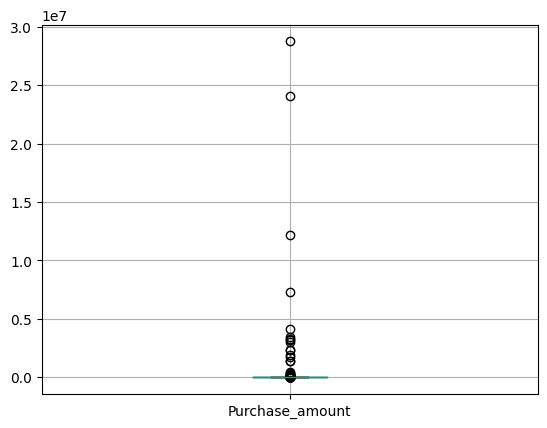

In [ ]:
df.boxplot(column='Purchase_amount')

<Axes: >

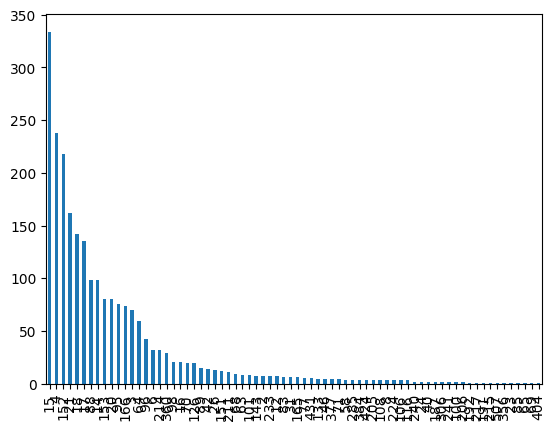

In [ ]:
df['chain'].value_counts().plot(kind='bar')

                      chain    market  repeater       PCT       PQT       PCY  \
chain              1.000000  0.536471  0.543759  0.094544 -0.021563  0.101031   
market             0.536471  1.000000  0.287375 -0.011973 -0.151410 -0.009533   
repeater           0.543759  0.287375  1.000000  0.056168 -0.129212  0.072667   
PCT                0.094544 -0.011973  0.056168  1.000000 -0.005427  0.980840   
PQT               -0.021563 -0.151410 -0.129212 -0.005427  1.000000  0.019181   
PCY                0.101031 -0.009533  0.072667  0.980840  0.019181  1.000000   
PBD                0.100939 -0.009359  0.072974  0.986836  0.019518  0.997679   
Purchase_amount    0.092911 -0.011928  0.053575  0.999862 -0.009465  0.977970   
Purchase_quantity  0.095324 -0.011790  0.052327  0.995247 -0.016258  0.970235   
cluster           -0.098210 -0.451050  0.211181  0.049099  0.010975  0.046814   
offervalue         0.046115  0.024860  0.093885  0.062986 -0.011026  0.059861   
dynamic_price     -0.200975 

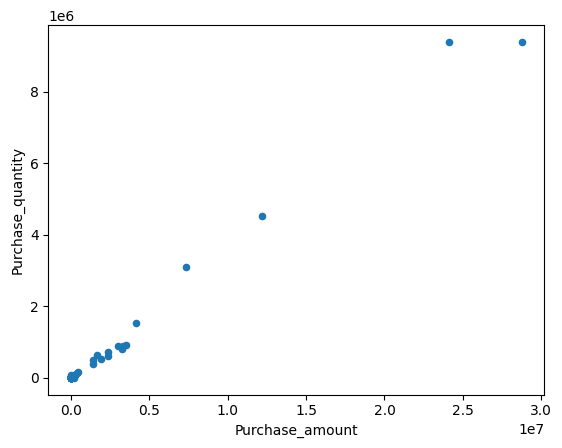

In [ ]:
# scatter plot of purchase_amount and purchase_quantity
df.plot(kind='scatter', x='Purchase_amount', y='Purchase_quantity')

# correlation matrix of all variables
print(df.corr())


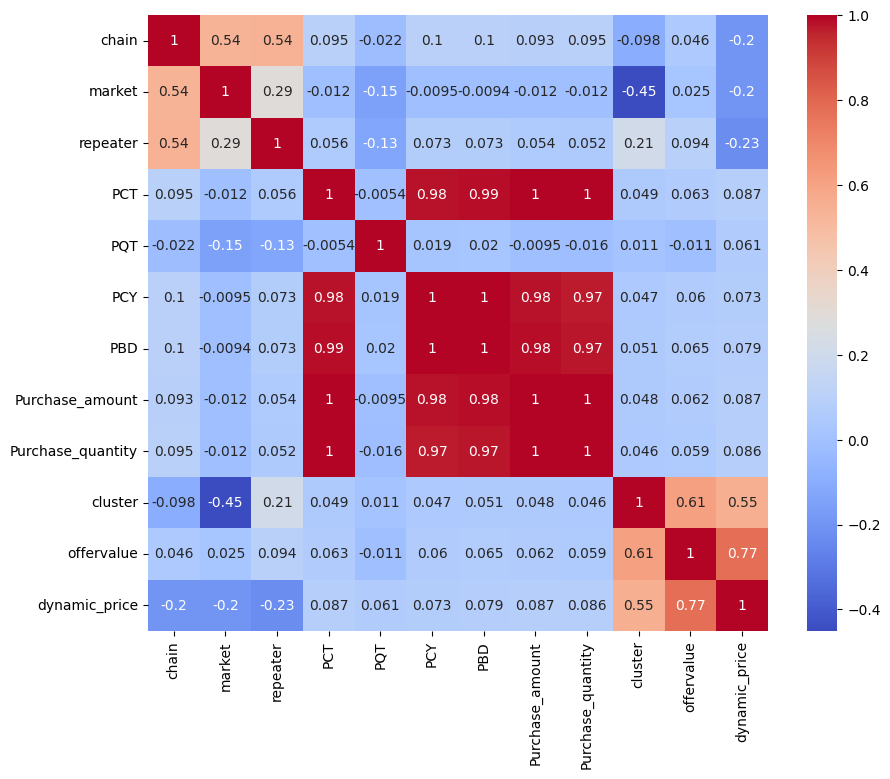

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from joblib.externals.cloudpickle import list_registry_pickle_by_value
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

X = df.drop(['repeater', 'cluster'], axis=1)
y = df['repeater']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=7, step=1)
rfe.fit(X, y)
X = X[X.columns[rfe.support_]]
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(lr, X, y, cv=skf, scoring='accuracy')
precision_scores = cross_val_score(lr, X, y, cv=skf, scoring='precision')
recall_scores = cross_val_score(lr, X, y, cv=skf, scoring='recall')
f1_scores = cross_val_score(lr, X, y, cv=skf, scoring='f1')

print("Accuracy: {:.3f} ({:.3f})".format(accuracy_scores.mean(), accuracy_scores.std()))
print("Precision: {:.3f} ({:.3f})".format(precision_scores.mean(), precision_scores.std()))
print("Recall: {:.3f} ({:.3f})".format(recall_scores.mean(), recall_scores.std()))
print("F1: {:.3f} ({:.3f})".format(f1_scores.mean(), f1_scores.std()))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.788 (0.018)
Precision: 0.798 (0.029)
Recall: 0.774 (0.032)
F1: 0.785 (0.018)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# create the logistic regression model and fit it to the training data
lr.fit(X_train, y_train)

# make predictions on the testing data
y_pred = lr.predict(X_test)

# calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# print the performance metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", confusion)

Accuracy: 0.8043478260869565
Precision: 0.8436018957345972
Recall: 0.7574468085106383
F1 score: 0.7982062780269059
Confusion matrix:
 [[192  33]
 [ 57 178]]


In [ ]:
dtc = DecisionTreeClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(dtc, X, y, cv=skf, scoring='accuracy')
precision_scores = cross_val_score(dtc, X, y, cv=skf, scoring='precision')
recall_scores = cross_val_score(dtc, X, y, cv=skf, scoring='recall')
f1_scores = cross_val_score(dtc, X, y, cv=skf, scoring='f1')

print("Accuracy: {:.3f} ({:.3f})".format(accuracy_scores.mean(), accuracy_scores.std()))
print("Precision: {:.3f} ({:.3f})".format(precision_scores.mean(), precision_scores.std()))
print("Recall: {:.3f} ({:.3f})".format(recall_scores.mean(), recall_scores.std()))
print("F1: {:.3f} ({:.3f})".format(f1_scores.mean(), f1_scores.std()))

Accuracy: 0.891 (0.008)
Precision: 0.880 (0.012)
Recall: 0.901 (0.024)
F1: 0.893 (0.014)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = dtc.predict(X_test)

# calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# print the performance metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", confusion)



Accuracy: 0.8956521739130435
Precision: 0.8879668049792531
Recall: 0.9106382978723404
F1 score: 0.8991596638655462
Confusion matrix:
 [[198  27]
 [ 21 214]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(rfc, X, y, cv=skf, scoring='accuracy')
precision_scores = cross_val_score(rfc, X, y, cv=skf, scoring='precision')
recall_scores = cross_val_score(rfc, X, y, cv=skf, scoring='recall')
f1_scores = cross_val_score(rfc, X, y, cv=skf, scoring='f1')

print("Accuracy: {:.3f} ({:.3f})".format(accuracy_scores.mean(), accuracy_scores.std()))
print("Precision: {:.3f} ({:.3f})".format(precision_scores.mean(), precision_scores.std()))
print("Recall: {:.3f} ({:.3f})".format(recall_scores.mean(), recall_scores.std()))
print("F1: {:.3f} ({:.3f})".format(f1_scores.mean(), f1_scores.std()))

Accuracy: 0.927 (0.020)
Precision: 0.963 (0.019)
Recall: 0.889 (0.022)
F1: 0.924 (0.021)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", confusion)


Accuracy: 0.9282608695652174
Precision: 0.9675925925925926
Recall: 0.8893617021276595
F1 score: 0.9268292682926829
Confusion matrix:
 [[218   7]
 [ 26 209]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(nb, X, y, cv=skf, scoring='accuracy')
precision_scores = cross_val_score(nb, X, y, cv=skf, scoring='precision')
recall_scores = cross_val_score(nb, X, y, cv=skf, scoring='recall')
f1_scores = cross_val_score(nb, X, y, cv=skf, scoring='f1')

print("Accuracy: {:.3f} ({:.3f})".format(accuracy_scores.mean(), accuracy_scores.std()))
print("Precision: {:.3f} ({:.3f})".format(precision_scores.mean(), precision_scores.std()))
print("Recall: {:.3f} ({:.3f})".format(recall_scores.mean(), recall_scores.std()))
print("F1: {:.3f} ({:.3f})".format(f1_scores.mean(), f1_scores.std()))

Accuracy: 0.587 (0.015)
Precision: 0.969 (0.022)
Recall: 0.179 (0.028)
F1: 0.302 (0.041)


In [ ]:
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", confusion)


Accuracy: 0.5630434782608695
Precision: 0.9722222222222222
Recall: 0.14893617021276595
F1 score: 0.25830258302583026
Confusion matrix:
 [[224   1]
 [200  35]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", confusion)

Accuracy: 0.9391304347826087
Precision: 0.9769585253456221
Recall: 0.902127659574468
F1 score: 0.9380530973451326
Confusion matrix:
 [[220   5]
 [ 23 212]]


In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=42
)

xgb_clf.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", confusion)

Accuracy: 0.9391304347826087
Precision: 0.9769585253456221
Recall: 0.902127659574468
F1 score: 0.9380530973451326
Confusion matrix:
 [[220   5]
 [ 23 212]]


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", confusion)

Accuracy: 0.8195652173913044
Precision: 0.9086021505376344
Recall: 0.7191489361702128
F1 score: 0.8028503562945369
Confusion matrix:
 [[208  17]
 [ 66 169]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/50
58/58 [==============================] - 1s 2ms/step - loss: 12583.9766 - accuracy: 0.4777
Epoch 2/50
58/58 [==============================] - 0s 2ms/step - loss: 8735.0283 - accuracy: 0.4647
Epoch 3/50
58/58 [==============================] - 0s 2ms/step - loss: 5859.8950 - accuracy: 0.4652
Epoch 4/50
58/58 [==============================] - 0s 2ms/step - loss: 2769.1858 - accuracy: 0.4745
Epoch 5/50
58/58 [==============================] - 0s 2ms/step - loss: 135.5205 - accuracy: 0.5690
Epoch 6/50
58/58 [==============================] - 0s 2ms/step - loss: 10.4945 - accuracy: 0.6766
Epoch 7/50
58/58 [==============================] - 0s 2ms/step - loss: 9.5901 - accuracy: 0.7201
Epoch 8/50
58/58 [==============================] - 0s 2ms/step - loss: 8.7236 - accuracy: 0.7353
Epoch 9/50
58/58 [==============================] - 0s 2ms/step - loss: 6.8495 - accuracy: 0.7408
Epoch 10/50
58/58 [==============================] - 0s 2ms/step - loss: 6.7113 - accuracy: 0.7440
Epo

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion matrix:\n", confusion)

Accuracy: 0.5108695652173914
Precision: 0.5108695652173914
Recall: 1.0
F1 score: 0.6762589928057554
Confusion matrix:
 [[  0 225]
 [  0 235]]
